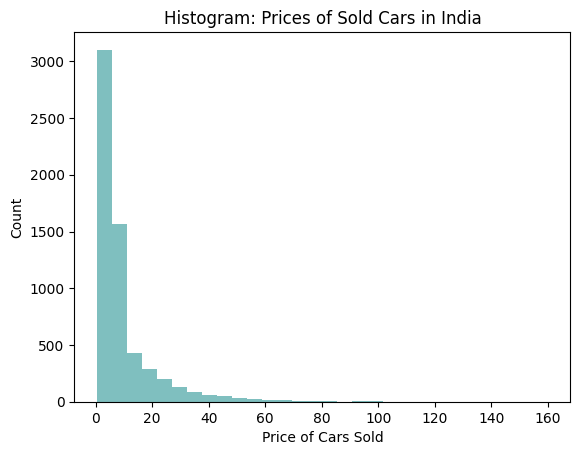

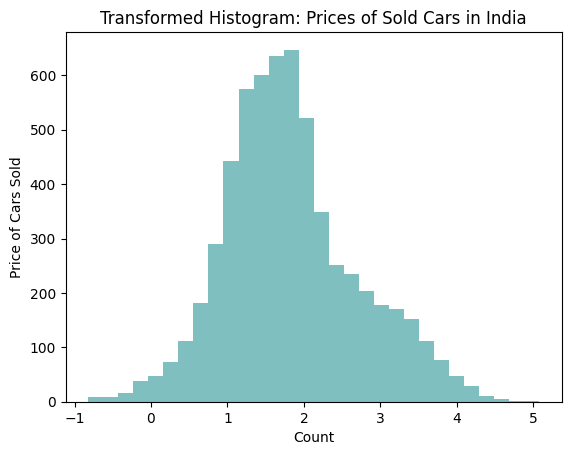

Power     143
Engine     36
dtype: int64
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
Company                 0
Model                   0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     7692.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:44:37   Log-Likelihood:                -2280.0
No. Observations:                6019   AIC:                             4570.
Df 

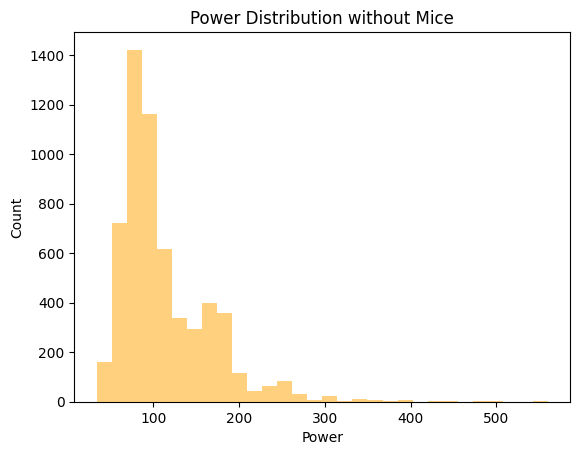

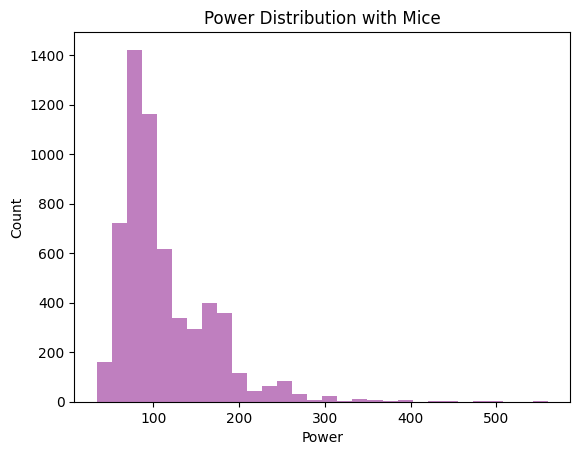

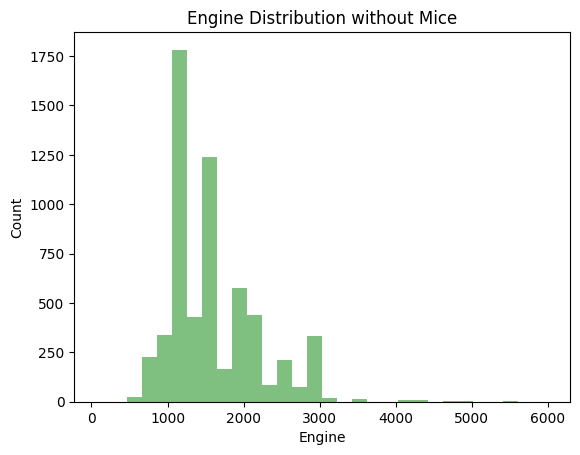

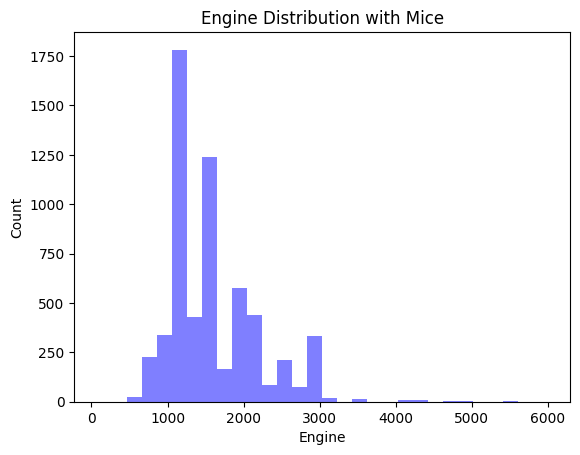

In [6]:
#Nedim Hodzic

#Exercise 05: T54-574
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

#We’ll be still be using the train.csv data set for this lab. The data set covers the characteristics and prices
#for used cars sold in India. We are interested in predicting the price of a car given some characteristics.
#We will attempt to build a linear regression model of Price. This time we are going to work on filling in
#the missing data that we previously dropped.
df1 = pd.read_csv('/Users/nedim/Downloads/train.csv')
#print(df1)
#df.describe()

#1. Transform the Price so it looks more normal
plt.hist(df1['Price'], bins=30, alpha=0.5, color='teal')
plt.title("Histogram: Prices of Sold Cars in India")
plt.xlabel("Price of Cars Sold")
plt.ylabel("Count")
plt.show()
#The plotted distribution is not normal, see below for transformation.
df1["Mileage"] = df1["Mileage"].str.rstrip(" kmpl")
df1["Mileage"] = df1["Mileage"].str.rstrip(" km/g")
df1["Engine"] = df1["Engine"].str.rstrip(" CC")
df1["Power"] = df1["Power"].str.rstrip(" bhp")
df1["Power"]= df1["Power"].replace(regex="null", value = np.nan)
df1["Fuel_Type"]=df1["Fuel_Type"].astype("category")
df1["Transmission"]=df1["Transmission"].astype("category")
df1["Owner_Type"]=df1["Owner_Type"].astype("category")
df1["Mileage"]=df1["Mileage"].astype("float")
df1["Power"]=df1["Power"].astype("float")
df1["Engine"]=df1["Engine"].astype("float")
df1["Company"]=df1["Name"].str.split(" ").str[0]
df1["Model"]=df1["Name"].str.split(" ").str[1]+df1["Name"].str.split(" ").str[2]

#To transform price, we'll take the natural log of this variable
df1['Price'] = np.log(df1['Price'])

#plot the data and label the graph
plt.hist(df1['Price'], bins=30, alpha=0.5, color='teal')
plt.title("Transformed Histogram: Prices of Sold Cars in India")
plt.xlabel("Count")
plt.ylabel("Price of Cars Sold")
plt.show()

#2. How many values are missing for Power and Engine?
#143 values for Power, 36 for Engine
Power_and_Engine_null_values = df1[["Power","Engine"]].isnull().sum()
print(Power_and_Engine_null_values)

#3. Which column has the most missing values and what should we do about it?
#The column with the most missing values is "New_Price"
#New_Price is missing 5195 values
#We should remove it from the dataset
All_null_values = df1.isnull().sum()
print(All_null_values)
#drop column
df1.drop("New_Price",axis=1,inplace=True)
#print(df1)

#4. Build a model of transformed price based on Power, Engine, Kilometers Driven, and Year, how much variance is explained?
#source: https://www.statsmodels.org/stable/example_formulas.html
lm = ols('Price ~ Year + Kilometers_Driven + Engine + Power', data=df1).fit()
#print(lm.summary())
#83.2% of the variance is explained according to our Adj. R^2 value of 0.83.2

#5. How many rows were used to train the model?
#Our model tells us that the number of observations is 5876
#This means that 5876 rows were used to train the model

#6. Fill the missing values in Power and Engine with their respective means and rebuild the model.
#Now how much variance is explained?
df1_rebuild = df1.copy()
Mean_Engine = df1_rebuild['Engine'].mean()
Mean_Power = df1_rebuild['Power'].mean()
df1_rebuild['Engine'] = df1_rebuild['Engine'].fillna(Mean_Engine)
df1_rebuild['Power'] = df1_rebuild['Power'].fillna(Mean_Power)

lm = ols('Price ~ Year + Kilometers_Driven + Engine + Power', data=df1_rebuild).fit()
#print(lm.summary())

#Adj. R-squared = 0.828
#82.8% of the variance is explained

#7. How many rows were used to train the model?
#Our model tells us that the number of observations is 6019
#This means that 6019 rows were used to train the model

#8. Impute the missing data using MICE and rebuild the model
#source: https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87
df_mice = df1.filter(['Price', 'Year', 'Kilometers_Driven', 'Engine', 'Power'], axis=1).copy()
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)
lm = ols('Price ~ Year + Kilometers_Driven + Engine + Power', data=df_mice_imputed).fit()
print(lm.summary())
#Adj. R-squared = 0.836
#83.6% of the variance is explained

#9. How have the parameter estimates changed from step 4?
#The parameter estimates have changed from step 4 and a greater % of the variance is explained with our MICE model.
#Instead of training our model with 5876 rows (Step 4), our MICE model had 6019 rows.
#By replacing our null values instead of dropping them, the fit of our data has improved.

#10.  Plot the distribution of Power with and without MICE

plt.hist(df1['Power'], bins=30, alpha=0.5, color='orange')
plt.title("Power Distribution without Mice")
plt.xlabel("Power")
plt.ylabel("Count")
plt.show()

plt.hist(df_mice['Power'], bins=30, alpha=0.5, color='purple')
plt.title("Power Distribution with Mice")
plt.xlabel("Power")
plt.ylabel("Count")
plt.show()

#11.  Plot the distribution of Engine with and without MICE

plt.hist(df1['Engine'], bins=30, alpha=0.5, color='green')
plt.title("Engine Distribution without Mice")
plt.xlabel("Engine")
plt.ylabel("Count")
plt.show()

plt.hist(df_mice['Engine'], bins=30, alpha=0.5, color='blue')
plt.title("Engine Distribution with Mice")
plt.xlabel("Engine")
plt.ylabel("Count")
plt.show()
